In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys)

<built-in method keys of Bunch object at 0x000002026EF1E728>


In [ ]:
#설명서 확인하기
print(boston 
     c)

In [3]:
#데이터 살펴보기
import pandas as pd
boston+df = pd.DataFrame(boston['date'],    #학습데이터
                        columns = boston['feature_names'])
boston_df['TARGET'] = boston['target']
boston_df

SyntaxError: can't assign to operator (<ipython-input-3-90192b0b319c>, line 3)

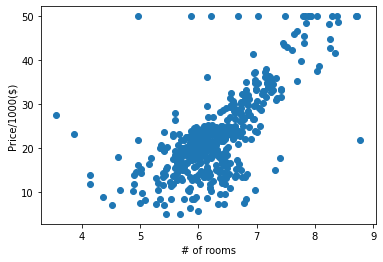

In [5]:
#RM변수와 TARGET과의 관계 시각화
import matplotlib.pyplot as plt
X_rooms = boston['data'][:, 5]   #학습데이터의 전체 행, 5번 열
#산점도 그리기
plt.scatter(X_rooms, boston['target'])
plt.xlabel("# of rooms")
plt.ylabel("Price/1000($)")
plt.show()

In [8]:
#선형 회귀 모델의 생성
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

#학습진행
reg.fit(X_rooms.reshape(-1, 1),     #학습데이터
        boston['target'])    #라벨데이터

#최종학습: 회귀 선을 위한 가중치와 절편을 구하는 것 
print("모델의 가중치: ", reg.coef_)
print("모델의 절편: ", reg.intercept_)

모델의 가중치:  [9.10210898]
모델의 절편:  -34.670620776438554


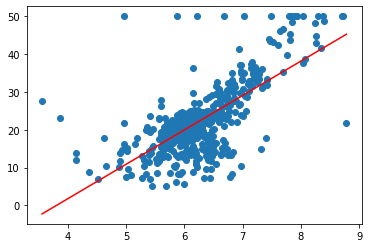

In [10]:
#실제 학습데이터와 회귀선
import numpy as np
pred_space = np.linspace(
    min(X_rooms), max(X_rooms)
).reshape(-1, 1)

#선점도 그리기
plt.scatter(X_rooms,      #X축
           boston['target'])    #y축

#회귀선 그리기
plt.plot(pred_space,     #x축
        reg.predict(pred_space),
        color = "red"
        )     #우리 모델의 예측값
plt.show()

In [12]:
#boston데이터셋 모든 특성을 이용한 예측
#학습데이터와 테스트 데이터 분할하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston['data'], boston['target'],
    test_size = 0.3, 
    random_state = 42
)

In [14]:
#학습진행하기
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)                           

LinearRegression()

In [16]:
#가중치와 절편 확인하기
print("가중치: ", reg_all.coef_)
print("절편: ", reg_all.intercept_)

가중치:  [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
절편:  31.63108403569312


In [20]:
#모델 검증하기
print("훈련 세트 점수: {:.2f}".format(reg_all.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(reg_all.score(X_test, y_test)))

훈련 세트 점수: 0.74
테스트 세트 점수: 0.71


In [24]:
#boston데이터셋의 첫번째 데이터와 타겟
print("데이터 셋 관측치: ", boston['data'][0])
print("데이터 셋 label: ", boston['target'][0])

#모델이 예측한 예측치 확인하기
reg_all.predict(boston['data'][0].reshape(1, 13))
reg_all.predict(boston['data'][1].reshape(1, 13))

데이터 셋 관측치:  [6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
데이터 셋 label:  24.0


array([24.90986918])

In [25]:
#Ridge회귀
#L2 규제를 사용하여 특성의 계수(기울기)를 최소화하는 모델
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1,    #알파계수(규제)
             normalize = True
             )
#학습시키기
ridge.fit(X_train, y_train)

print("Ridge 훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("Ridge 테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

Ridge 훈련 세트 점수: 0.74
Ridge 테스트 세트 점수: 0.70


In [30]:
#Lasso 회귀
#L1규제를 사용하여 특정계수를 0으로 만들어 영향을 미치지 않도록 함  --특성선택의 효과
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1,    #알파계수(규제)
             normalize = True
             )
#학습시키기
lasso.fit(X_train, y_train)

print("Lasso 훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("Lasso 테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("계수: ", lasso.coef_)  #라소 회귀는 특성 계수를 0으로 만든다!
print("사용된 특성의 개수: ", np.sum(lasso.coef_ != 0))

Lasso 훈련 세트 점수: 0.62
Lasso 테스트 세트 점수: 0.60
계수:  [-0.          0.         -0.          0.         -0.          3.18852894
 -0.         -0.         -0.         -0.         -0.3066901   0.
 -0.48666476]
사용된 특성의 개수:  3


In [31]:
#분류용 선형모델
#LinearRegression, SVC(서포트 벡터 머신)

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [38]:
#데이터 셋 분할하기
X_train, X_test, y_train, y_test = train_test_split(
    cancer['data'], cancer['target'], 
    stratify = cancer.target,
    random_state = 42
)

#선형회귀
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("LOGREG 훈련점수: {:.2f}".format(logreg.score(X_train, y_train)))
print("LOGREG 테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

LOGREG 훈련점수: 0.95
LOGREG 테스트 세트 점수: 0.97


c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
#서포트 벡터 머신: 회귀, 분류 양쪽 모두 사용
from sklearn.svm import LinearSVC
svc = LinearSVC().fit(X_train, y_train)
print("SVC 훈련 세트 점수: {:.2f}".format(svc.score(X_train, y_train)))
print("SVC 훈련 테스트 점수: {:.2f}".format(svc.score(X_test, y_test)))

SVC 훈련 세트 점수: 0.93
SVC 훈련 테스트 점수: 0.93


c:\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [46]:
#규제 강도에 따른 정확도 확인
#과적합 방지
#선형회귀모델의 규제강도별 점수
logreg100 = LogisticRegression(C = 100).fit(X_train, y_train)   #규제 C=100
logreg = LogisticRegression().fit(X_train, y_train)  #규제 C=1
logreg001 = LogisticRegression(C = 0.01).fit(X_train, y_train)

for c, model in zip([100, 1, 0.01], [logreg100, logreg, logreg001]):
    print("C={}".format(c))
    print("훈련 세트점수: {:.2f}".format(model.score(X_train, y_train)))
    print("테스트 세트 점수: {:.2f}".format(model.score(X_test, y_test)))
          
#기본적으로는 L2규제(Ridge)

C=100
훈련 세트점수: 0.95
테스트 세트 점수: 0.97
C=1
훈련 세트점수: 0.95
테스트 세트 점수: 0.97
C=0.01
훈련 세트점수: 0.94
테스트 세트 점수: 0.93


c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ex

In [48]:
#규제방식에 따른 정확도 확인하기
l1lr100 = LogisticRegression(C = 100, 
                             solver='saga', 
                             penalty = 'l1').fit(X_train, y_train)
l1lr = LogisticRegression(solver='saga', 
                          penalty = 'l1').fit(X_train, y_train)
l1lr001 = LogisticRegression(C = 0.01, 
                             solver='saga', 
                             penalty = 'l1').fit(X_train, y_train)

for c, model in zip([100, 1, 0.01], [l1lr100, l1lr, l1lr001]):
    print("L1 규제 = {}".format(c))
    print("훈련 세트점수: {:.2f}".format(model.score(X_train, y_train)))
    print("테스트 세트 점수: {:.2f}".format(model.score(X_test, y_test)))

L1 규제 = 100
훈련 세트점수: 0.91
테스트 세트 점수: 0.92
L1 규제 = 1
훈련 세트점수: 0.91
테스트 세트 점수: 0.92
L1 규제 = 0.01
훈련 세트점수: 0.92
테스트 세트 점수: 0.92


c:\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
